In [72]:
#
# Created July 17, 2018
# Copyright S.W. Kim
#
import numpy as np
import matplotlib.pyplot

class Perceptron:
    def __init__(self, input_dim, hidden_dim, hidden_dim2, output_dim, lr=0.01):
        #input -> hidden 1, w1
        self.w1 =  np.random.normal(0.0, pow(input_dim, -0.5), (input_dim, hidden_dim))
        #hidden 1 -> hidden 2, w2
        self.w2 =  np.random.normal(0.0, pow(hidden_dim, -0.5), (hidden_dim, hidden_dim2))
        #두번째 히든레이어 -> 결과로 w3
        self.w3 = np.random.normal(0.0, pow(hidden_dim2, -0.5),(hidden_dim2, output_dim))

        #첫번째 히든레이어의 결과
        self.y1 = np.zeros((1,hidden_dim))
        #두번째 히든레이어의 결과
        self.y2 = np.zeros((1,hidden_dim2))

        self.lr = lr
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        self.hidden_dim2 = hidden_dim2
        self.output_dim = output_dim        
        self.theta = 0
        
        #back pro 
        self.q1 = None
        self.q2 = None
        self.q3 = None

    def softmax(self, x):
        e_x = np.exp(x - np.max(x))
        return e_x / e_x.sum(axis=0) # only difference
        
    def sigmoid(self, x):
        return 1/(1+np.exp(-x))

    def feedforward_upto_hidden1(self, x):
        a = x.astype(float)
        b = self.w1.astype(float)
        self.y1 = self.sigmoid(np.dot(a,b)-self.theta)
        return self.y1
    
    def feedforward_hid1_to_hid2(self,x):
        a = x.astype(float)
        b = self.w2.astype(float)
        self.y2 = self.sigmoid(np.dot(a,b)-self.theta)
        return self.y2

    def feedforward_hid2_to_out(self, x):
        a = x.astype(float)
        b = self.w3.astype(float)
        return self.sigmoid(np.dot(a, b)- self.theta)
    
    def feedforward(self,x):
        f1 = self.feedforward_upto_hidden1(x)
        f2 = self.feedforward_hid1_to_hid2(f1)
        f3 = self.feedforward_hid2_to_out(f2)
        return f3
    #정의하고 사용하진 않음
    
    # out -> hid 백프로퍼게이션
    def bprop_w3(self, g, y): # target, output
        self.q1 = (-2)*(g-y)*y*(1-y)
        self.q1 = np.dot(self.y2.reshape(self.hidden_dim2,1), self.q1.reshape(1,self.output_dim)) # hidden 2 와 out중 더 높은 디멘션으로 생성됨, 컬럼벡터
        return self.q1

    # hid -> input 으로 백프로퍼게이션
    def bprop_w2(self, g, y, y1): # target, output, input
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w3,q1)
        q2 = np.dot(y1.reshape(self.hidden_dim, 1), q2*self.y2*(1-self.y2).reshape(1,self.hidden_dim2))
        print(q2.shape,"bprw2")
        return q2

    def bprop_w1(self,x,g,y,y1,y2):
        q1 = (-2)*(g-y)*y*(1-y)
        q2 = np.dot(self.w3,q1)
        q2 = np.dot(y1.reshape(self.hidden_dim, 1), q2*self.y2*(1-self.y2).reshape(1,self.hidden_dim2))
        q2 = self.w2*q2
        q2 = q2*y2*(1-y2)
        q3 = np.dot(x.reshape(self.input_dim,1), q2*self.y1*(1-self.y1).reshape(1,self.hidden_dim)



        return self.q3

    def training(self, input, target):
        x = np.array(input).T
        y1 = self.feedforward_upto_hidden1(x)
        y2 = self.feedforward_hid1_to_hid2(y1)
        y = self.feedforward(x)
        
        
        z = 0
        g = np.array(target).T
        
        self.w3 = self.w3 - self.lr*self.bprop_w3(g, y)
        self.w2 = self.w2 - self.lr*self.bprop_w2( g, y, y1)
        self.w1 = self.w1 - self.lr*self.bprop_w1( x,g,y,y1,y2)

In [73]:
# Training
input_dim = 784
hidden_dim = 300
hidden_dim2 = 100
output_dim = 10
epoch = 10

pct = Perceptron(input_dim,hidden_dim,hidden_dim2,output_dim, 0.1)

training_dataset_file = open("mnist_train_200.csv", 'r')
#training_dataset_file = open("mnist_train.csv", 'r')

training_dataset_list = training_dataset_file.readlines()
training_dataset_file.close()
#input_list = list()

for k in range(epoch):
    pct.lr = pct.lr * 0.8  # learning lrate decay
    for i in training_dataset_list:
        all_values = i.split(',')
        inputs = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
#        input_list.append(inputs)
        
        targets = np.zeros(output_dim) + 0.01
        targets[int(all_values[0])] = 0.99
        
        pct.training(inputs, targets)

(300, 100) bprw2


AttributeError: 'builtin_function_or_method' object has no attribute 'input_dim'

In [48]:
# Test
test_dataset_file = open("mnist_test_200.csv", 'r')
#test_dataset_file = open("mnist_test.csv", 'r')

test_dataset_list = test_dataset_file.readlines()
test_dataset_file.close()
#output_list = list()

In [49]:
all_values = test_dataset_list[0].split(',')
print(all_values[0])
pct.feedforward(np.asfarray(all_values[1:]))

7
<ipython-input-46-01b8cb04001a>:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


array([0.13355177, 0.04326249, 0.14114585, 0.127052  , 0.11084843,
       0.07571791, 0.08694832, 0.216118  , 0.08611855, 0.20350201])

Prediction fails. (target, predcition) =  7 9
Prediction =  [0.09320295 0.09711688 0.13142627 0.12178468 0.1217108  0.07811246
 0.08435252 0.19402604 0.08202044 0.19512412]
Prediction fails. (target, predcition) =  4 7
Prediction =  [0.12852171 0.05743701 0.14290104 0.12227986 0.14918166 0.07714379
 0.13252167 0.16300886 0.08003986 0.14796159]
Prediction fails. (target, predcition) =  4 9
Prediction =  [0.08079098 0.09987728 0.11613296 0.12467347 0.13526537 0.0801509
 0.09475029 0.17875636 0.07776435 0.19726354]
Prediction fails. (target, predcition) =  5 2
Prediction =  [0.15995485 0.07661099 0.17579158 0.11933638 0.12577412 0.07147884
 0.14912228 0.1176719  0.09048517 0.11768703]
Prediction fails. (target, predcition) =  6 2
Prediction =  [0.15445856 0.0843884  0.1789425  0.12793271 0.11878174 0.07249997
 0.12896382 0.12010288 0.09378341 0.12573195]
Prediction fails. (target, predcition) =  5 2
Prediction =  [0.147687   0.09099834 0.16888388 0.14280281 0.1166936  0.07275276
 0.124444

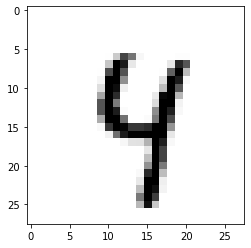

In [50]:
# Test error rate
success = 0
failure = 0

for i in test_dataset_list:
    all_values = i.split(',')
    target = int(all_values[0])
    
    all_values_normalized = (np.asfarray(all_values[1:])/255.0*0.99)+0.01
    prediction_list = pct.feedforward(np.asfarray(all_values_normalized))
    prediction = np.argmax(prediction_list)
    
    if target == prediction:
        success = success + 1
    else:
        failure = failure + 1
        
        print("Prediction fails. (target, predcition) = ", target, prediction)
        print("Prediction = ", prediction_list)

        im_array = np.asfarray(all_values_normalized).reshape((28,28))
        matplotlib.pyplot.imshow(im_array, cmap='Greys', interpolation='None')
        
print("Reconition error rate = ", (failure/(success+failure)))